In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("./data/cleaned_df.csv")

In [11]:
# unique city
df.neighbourhood_group.unique().tolist()

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [12]:
# unique room type
df.room_type.unique().tolist()

['Private room', 'Entire home/apt', 'Shared room']

<AxesSubplot: >

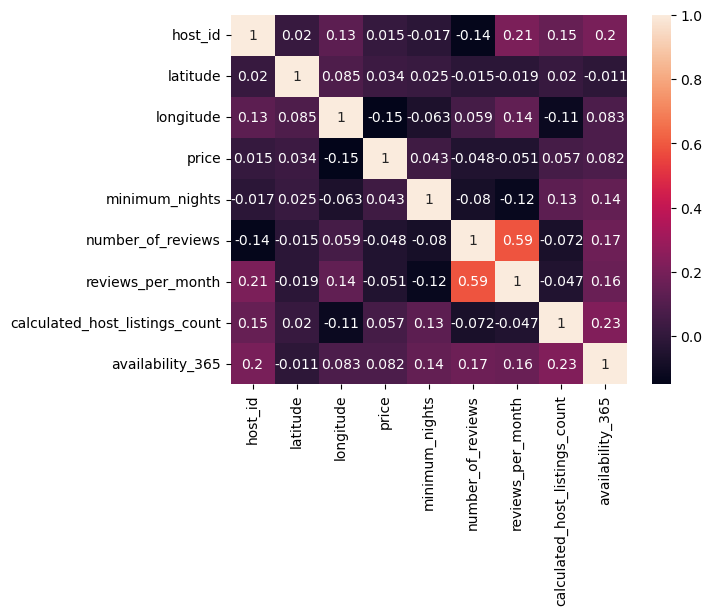

In [13]:
corr = df.corr(method = 'pearson')
sns.heatmap(corr, annot = True)

0.59 which is between "number_of_reviews" and "review_per_month" which makes little sense as if number of review per month will increase so number of reviews will also increase

In [15]:
# top 10 hosts hold maximum number of properties
df.host_id.value_counts().head(10)

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [17]:
# properties per area
neighborhood_group_counting = df['neighbourhood_group'].value_counts().reset_index()
neighborhood_group_counting.columns = ['neighbourhood_group','count']
neighborhood_group_counting['percent'] = neighborhood_group_counting['count'] / neighborhood_group_counting['count'].sum() * 100
neighborhood_group_counting

,neighbourhood_group,count,percent
0,Manhattan,21661,44.301053
1,Brooklyn,20104,41.116679
2,Queens,5666,11.588097
3,Bronx,1091,2.231312
4,Staten Island,373,0.762859


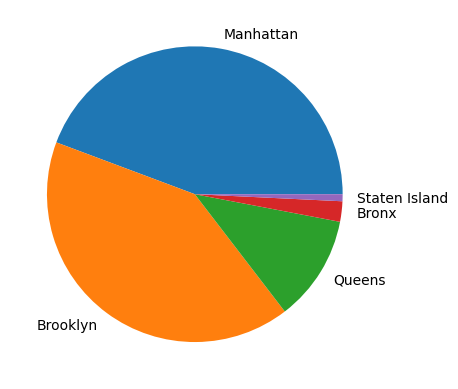

In [22]:
plt.pie(neighborhood_group_counting.percent.tolist(), labels= neighborhood_group_counting.neighbourhood_group.tolist(), explode= [0,0,0,0,0])
plt.show()

<AxesSubplot: xlabel='neighbourhood_group', ylabel='count'>

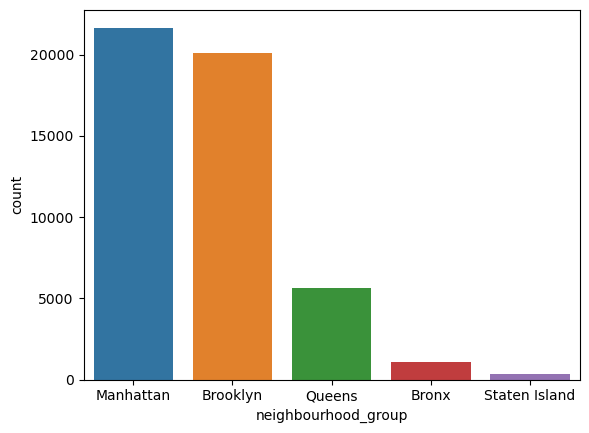

In [23]:
sns.barplot(data = neighborhood_group_counting, x ='neighbourhood_group',y ='count')

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

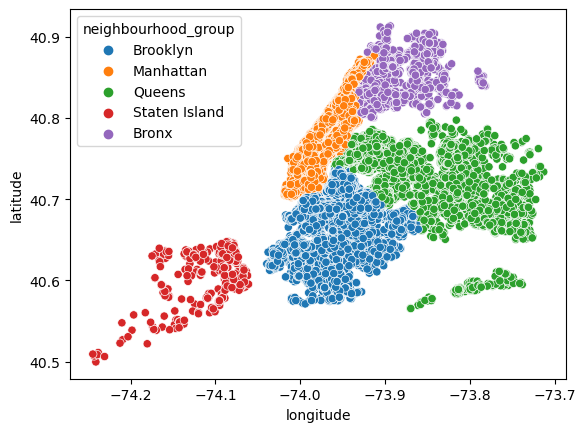

In [24]:
sns.scatterplot(x = df.longitude,y = df.latitude,hue= df.neighbourhood_group)

Manhattan have highest listing for the downtown region (esp below Central Park). In Staten Island, the areas close to the State Park have the highest lisitng. Brooklyn neighbourhoods close to Manhattan tend to have higher listing. Looking at the NY subway system in Brooklyn, it is interesting to observe that the highly listed areas correspond with subway line presence. The same is true for Bronx where subway lines do not go.

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

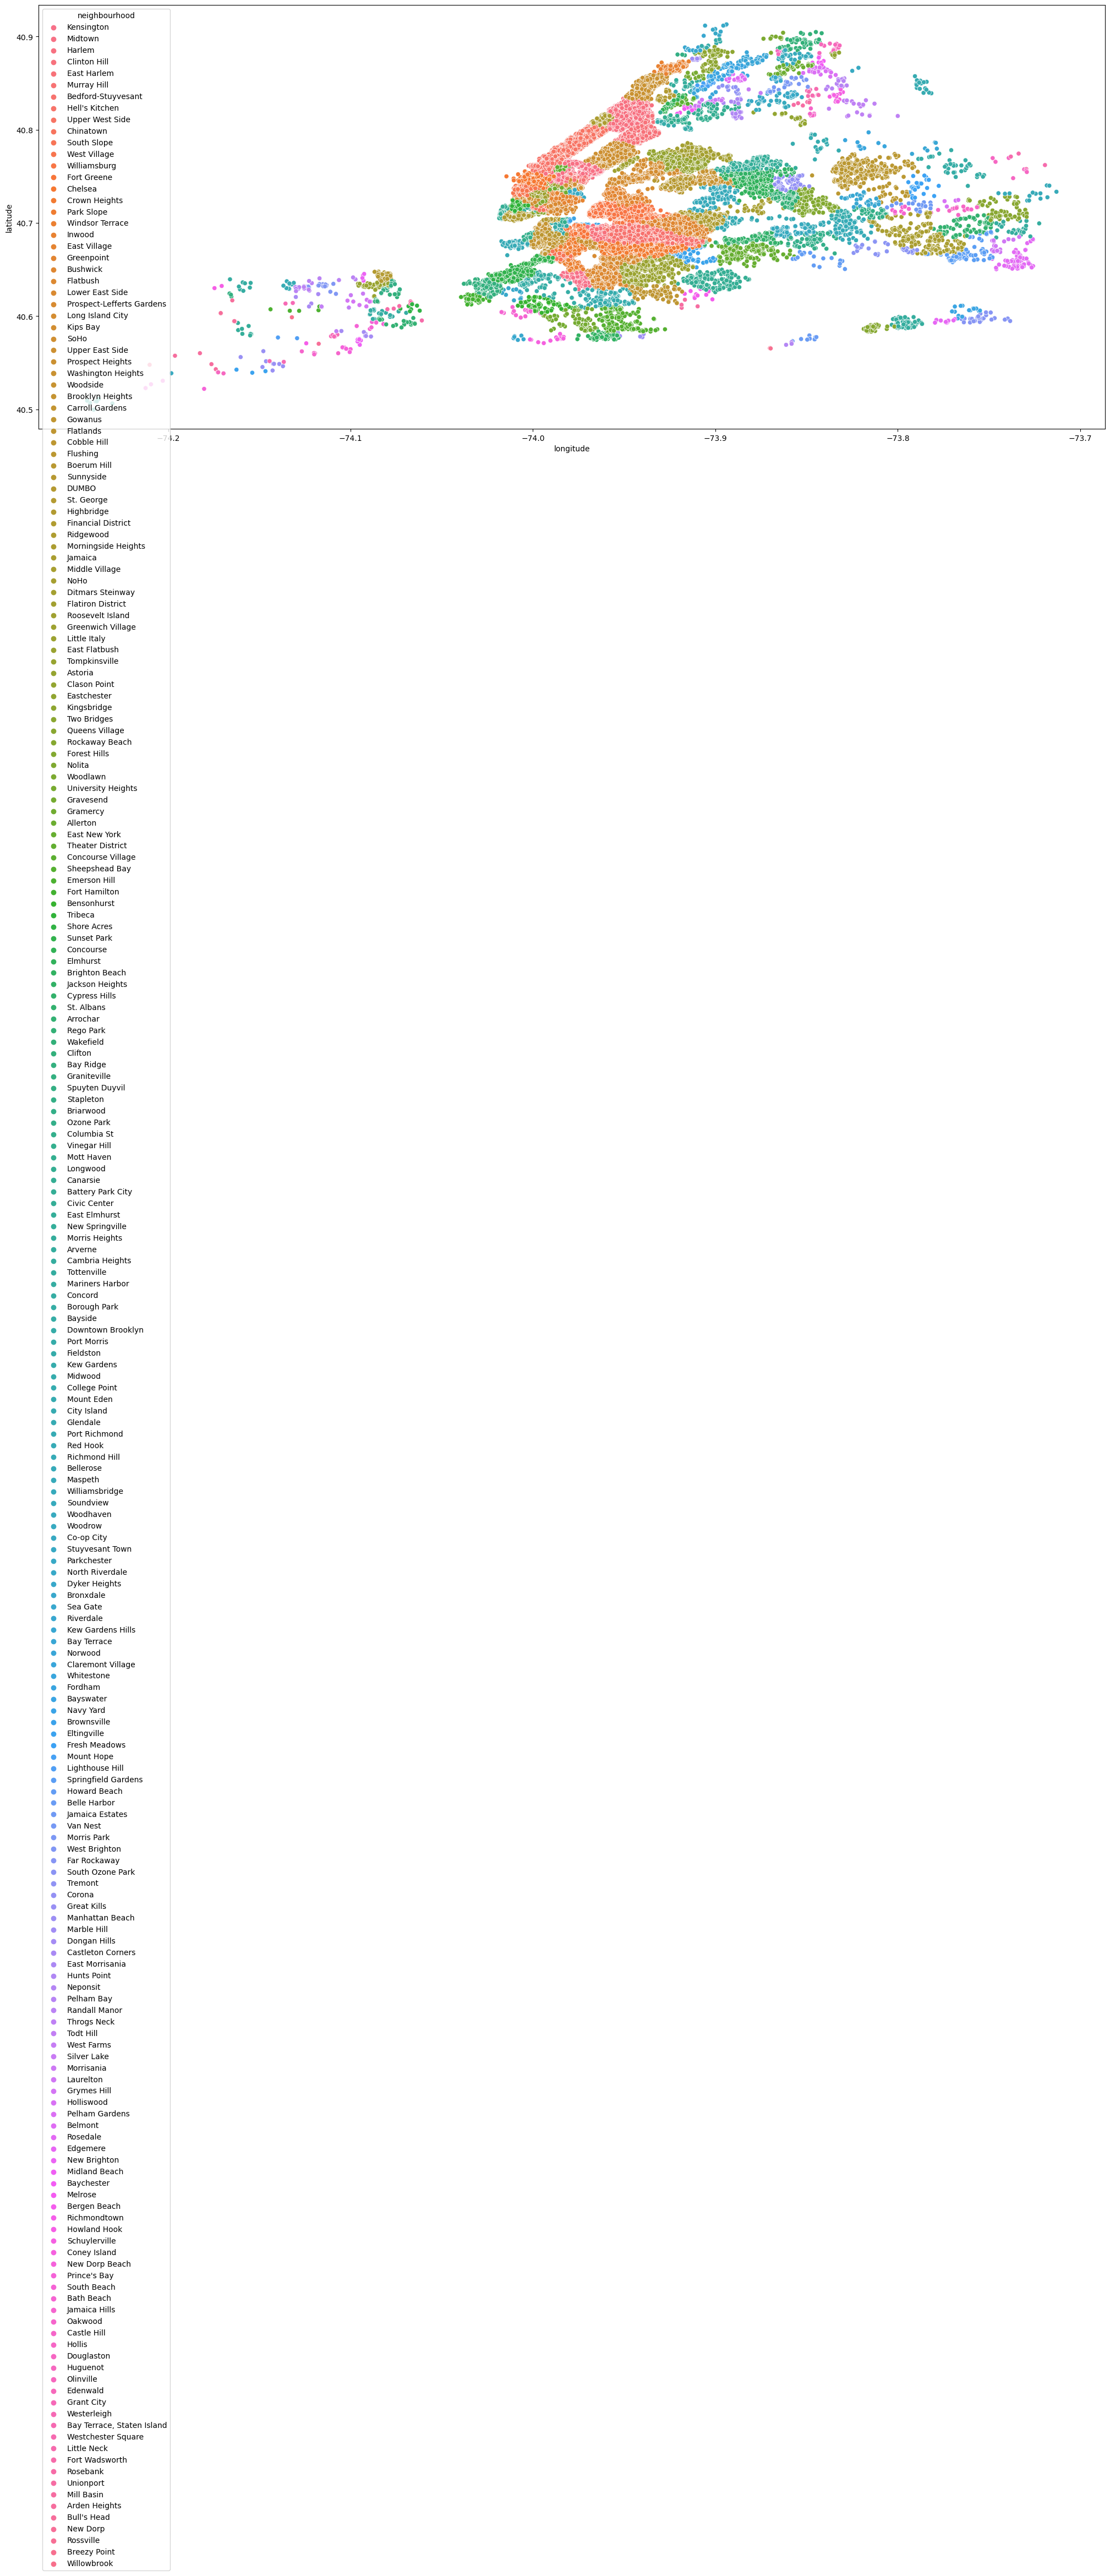

In [28]:
plt.figure(figsize = (25,10))
sns.scatterplot(x = df.longitude,y = df.latitude, hue = df.neighbourhood)

In [34]:
# total number of neighborhood
len(df.neighbourhood.unique())


221

In [35]:
# type of rooms
room = df['room_type'].value_counts().reset_index()
room.columns = ['room_type','counts']
room['percent'] = room['counts'] / room['counts'].sum()*100
room

,room_type,counts,percent
0,Entire home/apt,25409,51.966459
1,Private room,22326,45.661111
2,Shared room,1160,2.372431


<AxesSubplot: xlabel='room_type', ylabel='counts'>

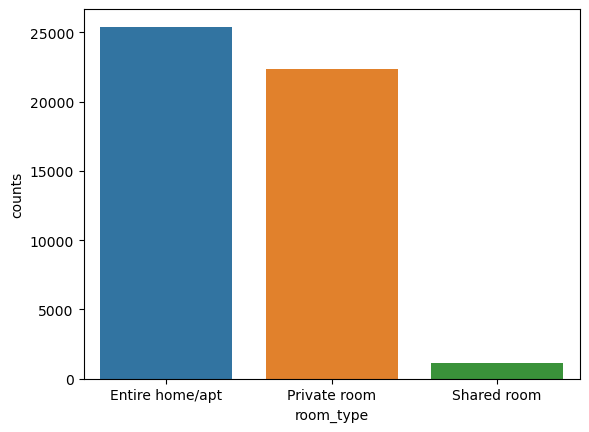

In [36]:
sns.barplot(data = room, x ='room_type',y ='counts')

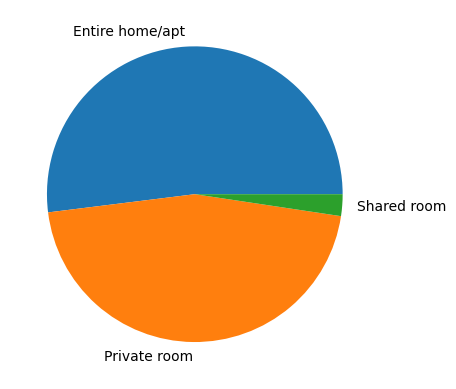

In [37]:
plt.pie(room.percent.tolist(), labels = room.room_type.tolist(), explode = [0,0,0] )
plt.show()

Both 'private room' and 'entire home/apt' have almost equal number of sharing

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

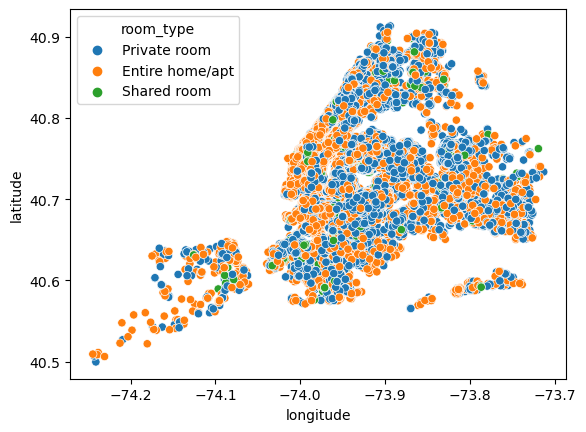

In [38]:
sns.scatterplot(x = df.longitude,y = df.latitude, hue = df.room_type)

'Staten Island' have more listing of Entire home/apt. where the maximum concentration is near St George, Tompkinsville and its surrounding neighbourhood.

'Bronx' have maximum lisiting of Entire home/aot fully spread in overall area, with some traces of private room.

'Queens' have alomost equal number of listing of both private rooms and entire home/apt. except the neighbourhoods of North-Western part of Queens such as Astoria where the concentration of Entire home/apt type room listing is maximum and neighbours of central Queens such as Elmhurst and maspeth have high concentration of private room listing.

'Brooklyn' is a state which is highly concentrated with both types of listing, but near Clinton Hill or Crown Heights there is high listing of 'Entire home/apt' while aera near Richmond Hill or ozone park have high listing of private rooms and southern Brooklyn also shows less concentration in the listing.

'Manhattan' is the most concentrated state in entire NY, concentrated with Entire home/apt throughout the state, though northern Manhattan shows good traces of private rooms.

In [40]:
# price statistics
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

The highest price is 10000, which is a outlier because median is 106, mean is 152. 

<AxesSubplot: xlabel='neighbourhood_group', ylabel='price'>

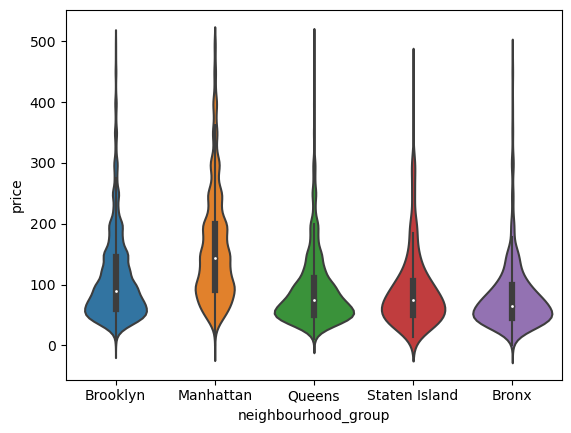

In [42]:
sns.violinplot(df[df.price < 500],x='neighbourhood_group',y='price')

The individual mean of every state is below or near to 100 while for Manhattan its greater (near to 150)

<AxesSubplot: xlabel='neighbourhood_group', ylabel='price'>

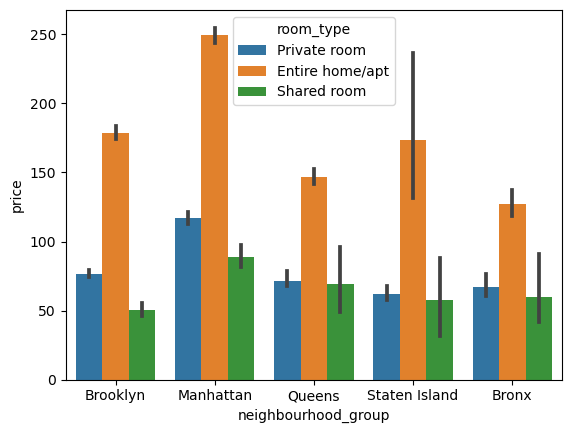

In [43]:
sns.barplot (df,  x = 'neighbourhood_group', y = 'price' , hue = 'room_type')

Almost every state share have equal number of private rooms and shared rooms except Manhattan and Brooklyn. Manhattan have maximum number of Entire home/apt typr of rooms followed by Brooklyn and staten island

In [46]:
df.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

/var/folders/kz/qx62v0210f7dbwdcqg3r84hc0000gn/T/ipykernel_36992/1383261222.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['minimum_nights']<=30) & (df['minimum_nights'] > 0)]['minimum_nights'],bins = 31)


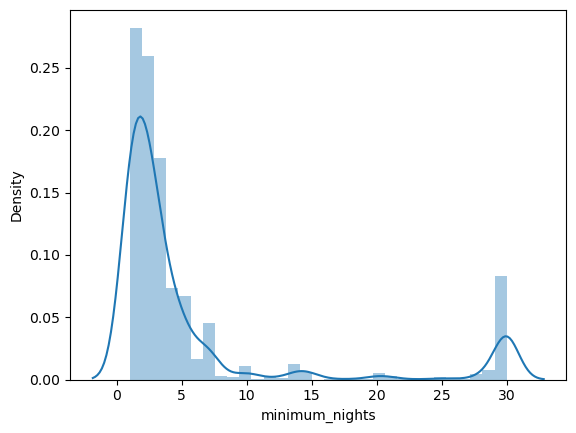

In [47]:
sns.distplot(df[(df['minimum_nights']<=30) & (df['minimum_nights'] > 0)]['minimum_nights'],bins = 31)
plt.show()

<AxesSubplot: xlabel='neighbourhood_group', ylabel='availability_365'>

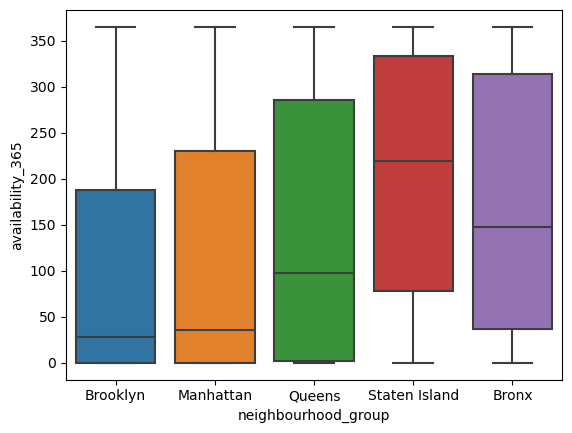

In [48]:
sns.boxplot(df, x='neighbourhood_group',y='availability_365')
